In [1]:
import numpy  as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse

import matplotlib.pyplot as plt
%matplotlib inline

import json
import urllib

# titanic dataset
import seaborn as sns

# 비정형 데이터 처리를 위한 라이브러리
from bs4 import BeautifulSoup
import requests
import re



print('numpy  version - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy  version -  1.20.3
pandas version -  1.3.4


In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.rcParams['font.family'] = 'AppleGothic'

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/Users/choijaewoo/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)


In [3]:
iris_dataset = sns.load_dataset('iris')
titan_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')

# 방법이 다르다.

In [4]:
titan_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks


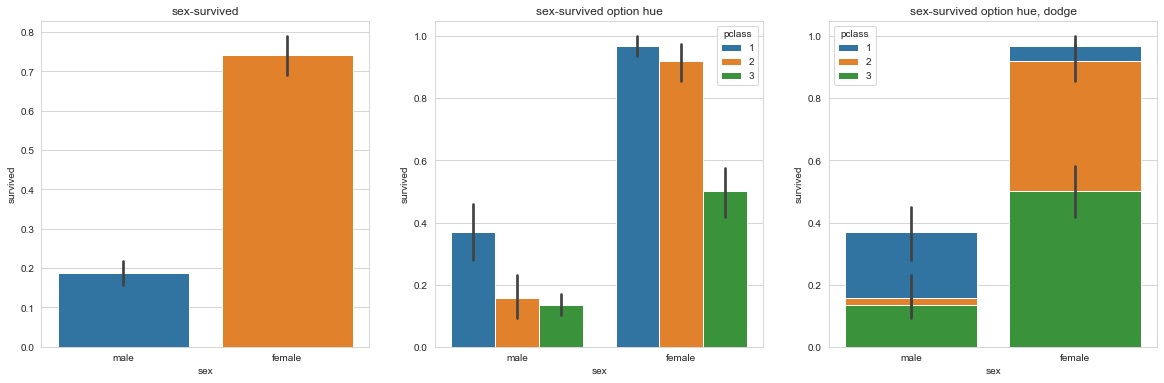

In [5]:
print('스타일 테마 적용 가능 - darkgrid, whitegrid, dark, white, ticks')
sns.set_style('whitegrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,3,1)
ax02= fig.add_subplot(1,3,2)
ax03= fig.add_subplot(1,3,3)

# 위에는 도화지의 위치이다

ax01.set_title('sex-survived')
ax02.set_title('sex-survived option hue')
ax03.set_title('sex-survived option hue, dodge')

sns.barplot(ax = ax01, data = titan_dataset, x ='sex', y ='survived')
sns.barplot(ax = ax02, data = titan_dataset, x ='sex', y ='survived' , hue = 'pclass') # 클라스별로 기준을 나누어 준다
sns.barplot(ax = ax03, data = titan_dataset, x ='sex', y ='survived' , hue = 'pclass' , dodge = False) # 누적바가 된다. 하지만 평균을 구해서 누적하는 것은 아니다.


plt.show()
plt.close()

In [6]:
tips_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


요일별 전체 팁과 요일별 매출을 시각화 한다면 - 


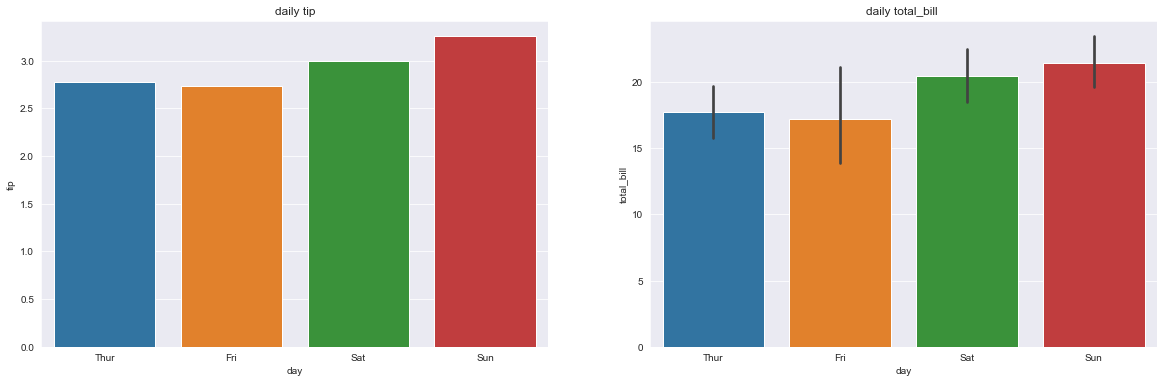

In [7]:
print('요일별 전체 팁과 요일별 매출을 시각화 한다면 - ')

sns.set_style('darkgrid')

fig = plt.figure(figsize = (20,6))

ax01= fig.add_subplot(1,2,1)
ax02= fig.add_subplot(1,2,2)

# 위에는 도화지의 위치이다

ax01.set_title('daily tip')
ax02.set_title('daily total_bill ')

# ci = False ci = sd
sns.barplot(ax = ax01, data = tips_dataset, x ='day', y ='tip', ci = False)
sns.barplot(ax = ax02, data = tips_dataset, x ='day', y ='total_bill') # 클라스별로 기준을 나누어 준다


plt.show()
plt.close()